
### Assignment 8: Logistic Regression

#### Goal
In this assignment, you'll explore the effect of shifting clusters in a dataset on the parameters of a logistic regression model. You will implement parts of the code to:
1. Generate datasets with shifted clusters.
2. Fit a logistic regression model and extract parameters.
3. Visualize the data, decision boundary, and logistic regression results.
4. Analyze how these parameters change with increasing shift distances.

#### Steps and Tasks

1. **Generate Clusters with a Shift**  
2. **Record Parameters for Each Shift Distance**  
3. **Plot Each Dataset and Decision Boundary**  
4. **Calculate Logistic Loss for Each Model**  
5. **Plot Results Across Shift Distances**  

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.spatial.distance import cdist


1. **Generate Clusters with a Shift**  
   - Implement the code to shift the second cluster along both the x-axis and y-axis by a specified `distance` parameter. This step will simulate different levels of separation between clusters, which you will explore later in the assignment.
    

In [7]:
def generate_ellipsoid_clusters(distance, n_samples=100, cluster_std=0.5):
    np.random.seed(0)
    covariance_matrix = np.array([[cluster_std, cluster_std * 0.8], 
                                  [cluster_std * 0.8, cluster_std]])
    
    # Generate the first cluster (class 0)
    X1 = np.random.multivariate_normal(mean=[1, 1], cov=covariance_matrix, size=n_samples)
    y1 = np.zeros(n_samples)

    # Generate the second cluster (class 1)
    X2 = np.random.multivariate_normal(mean=[1, 1], cov=covariance_matrix, size=n_samples)
    
    # Implement: Shift the second cluster along the x-axis and y-axis for a given distance
    raise NotImplementedError("Implement the shift of the second cluster")
    y2 = np.ones(n_samples)

    # Combine the clusters into one dataset
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    return X, y

# Function to fit logistic regression and extract coefficients
def fit_logistic_regression(X, y):
    model = LogisticRegression()
    model.fit(X, y)
    beta0 = model.intercept_[0]
    beta1, beta2 = model.coef_[0]
    return model, beta0, beta1, beta2


2. **Record Parameters for Each Shift Distance**  
   - Fit a logistic regression model to each generated dataset, and then extract and record the intercept (`beta0`) and coefficients (`beta1`, `beta2`) and any other necessary informtaion for each shift distance.

3. **Plot Each Dataset and Decision Boundary**  
   - Implement code to plot the data points for each class in different colors. Include the decision boundary calculated from `beta0`, `beta1`, and `beta2` values to visually separate the classes.

4. **Calculate Logistic Loss for Each Model**  
   - Implement code to compute the logistic loss for each shift distance. This loss reflects the accuracy of the logistic regression model at classifying the points in each dataset.

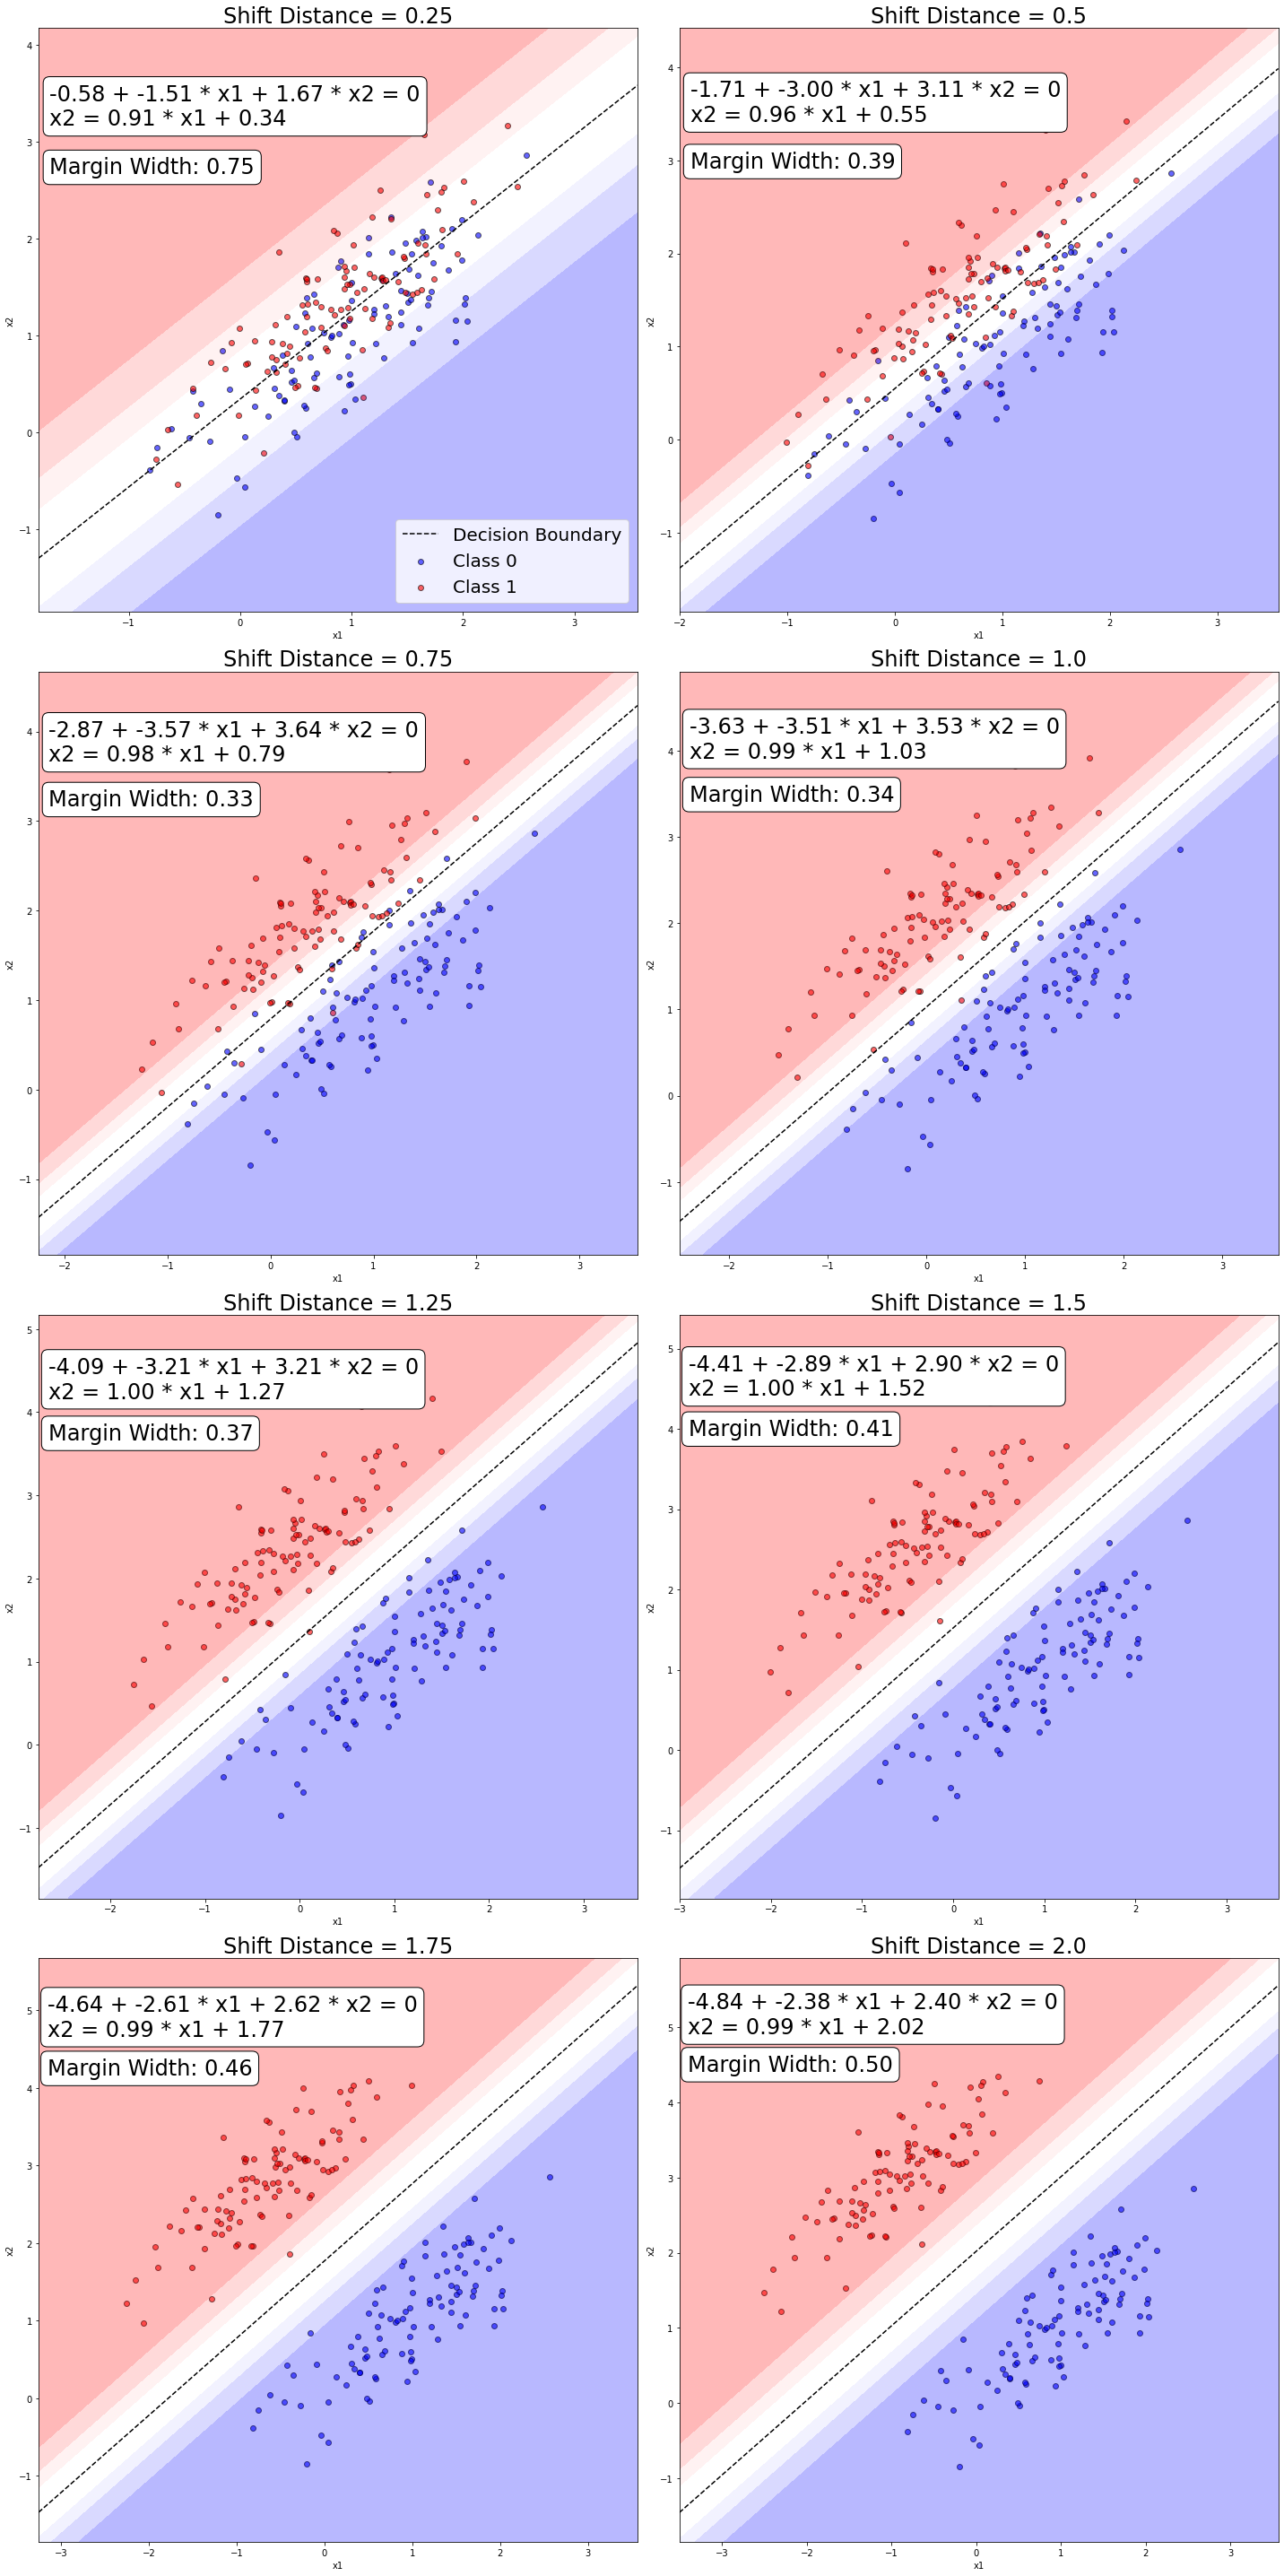

In [8]:
# Set up experiment parameters
shift_distances = np.linspace(0.25, 2.0, 8)  # Range of shift distances
beta0_list, beta1_list, beta2_list, slope_list, intercept_list, loss_list, margin_widths = [], [], [], [], [], [], []
sample_data = {}  # Store sample datasets and models for visualization

n_samples = 8
n_cols = 2  # Fixed number of columns
n_rows = (n_samples + n_cols - 1) // n_cols  # Calculate rows needed
plt.figure(figsize=(20, n_rows * 10))  # Adjust figure height based on rows

# Run experiments for each shift distance
for i, distance in enumerate(shift_distances, 1):
    X, y = generate_ellipsoid_clusters(distance=distance)
    # Implement: record all necessary information for each distance
    raise NotImplementedError("Record all necessary information for each distance")

    # Implement: Plot the dataset
    plt.subplot(n_rows, n_cols, i)
    raise NotImplementedError("Plot the dataset")

    # Implement: Calculate and store logistic loss
    raise NotImplementedError("Calculate and store logistic loss")

    # Calculate margin width between 70% confidence contours for each class
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Implement: Calculate decision boundary slope and intercept
    raise NotImplementedError("Calculate and plot decision boundary slope and intercept")

    # Plot fading red and blue contours for confidence levels
    contour_levels = [0.7, 0.8, 0.9]
    alphas = [0.05, 0.1, 0.15]  # Increasing opacity for higher confidence levels
    for level, alpha in zip(contour_levels, alphas):
        class_1_contour = plt.contourf(xx, yy, Z, levels=[level, 1.0], colors=['red'], alpha=alpha)  # Fading red for Class 1
        class_0_contour = plt.contourf(xx, yy, Z, levels=[0.0, 1 - level], colors=['blue'], alpha=alpha)  # Fading blue for Class 0
        if level == 0.7:
            distances = cdist(class_1_contour.collections[0].get_paths()[0].vertices, class_0_contour.collections[0].get_paths()[0].vertices, metric='euclidean')
            min_distance = np.min(distances)
            margin_widths.append(min_distance)

    plt.title(f"Shift Distance = {distance}", fontsize=24)
    plt.xlabel("x1")
    plt.ylabel("x2")

    # Display decision boundary equation and margin width on the plot
    equation_text = f"{beta0:.2f} + {beta1:.2f} * x1 + {beta2:.2f} * x2 = 0\nx2 = {slope:.2f} * x1 + {intercept:.2f}"
    margin_text = f"Margin Width: {min_distance:.2f}"
    plt.text(x_min + 0.1, y_max - 1.0, equation_text, fontsize=24, color="black", ha='left',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    plt.text(x_min + 0.1, y_max - 1.5, margin_text, fontsize=24, color="black", ha='left',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    if i == 1:
        plt.legend(loc='lower right', fontsize=20)

    sample_data[distance] = (X, y, model, beta0, beta1, beta2, min_distance)

plt.tight_layout()
plt.show()


5. **Plot Results Across Shift Distances**  
   - Implement code to create multiple plots that show how model parameters (`beta0`, `beta1`, `beta2`), slope, intercept, logistic loss, and margin width change as the shift distance increases.    

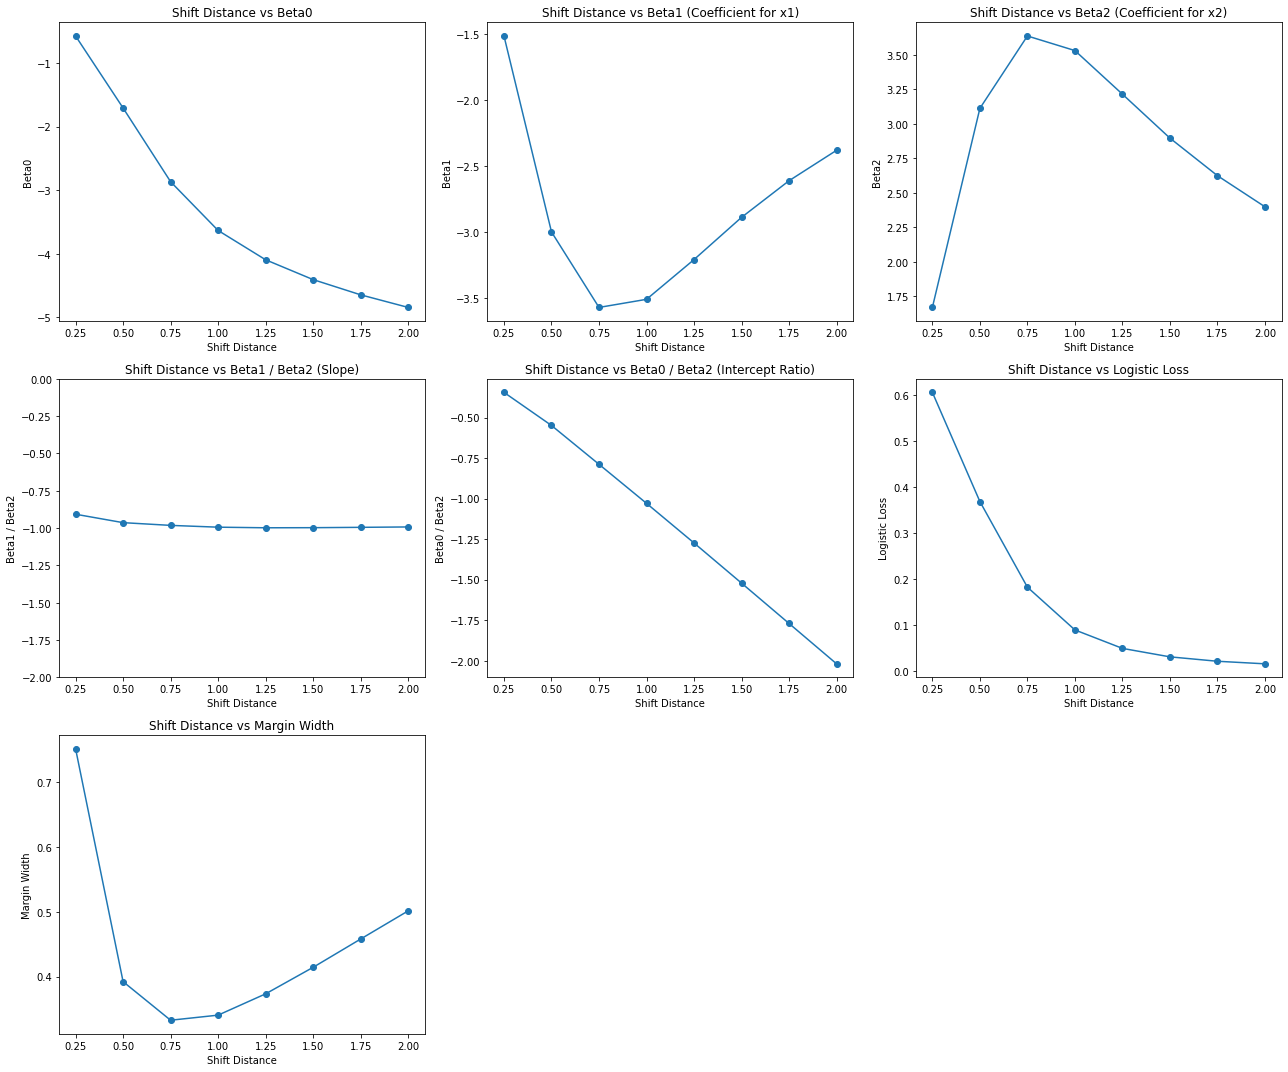

In [9]:
# Plot 1: Parameters vs. Shift Distance
plt.figure(figsize=(18, 15))

# Implement: Plot beta0
plt.subplot(3, 3, 1)
plt.title("Shift Distance vs Beta0")
plt.xlabel("Shift Distance")
plt.ylabel("Beta0")

# Implement: Plot beta1
plt.subplot(3, 3, 2)
plt.title("Shift Distance vs Beta1 (Coefficient for x1)")
plt.xlabel("Shift Distance")
plt.ylabel("Beta1")

# Implement: Plot beta2
plt.subplot(3, 3, 3)
plt.title("Shift Distance vs Beta2 (Coefficient for x2)")
plt.xlabel("Shift Distance")
plt.ylabel("Beta2")

# Implement: Plot beta1 / beta2 (Slope)
plt.subplot(3, 3, 4)
plt.title("Shift Distance vs Beta1 / Beta2 (Slope)")
plt.xlabel("Shift Distance")
plt.ylabel("Beta1 / Beta2")
plt.ylim(-2, 0)

# Implement: Plot beta0 / beta2 (Intercept ratio)
plt.subplot(3, 3, 5)
plt.title("Shift Distance vs Beta0 / Beta2 (Intercept Ratio)")
plt.xlabel("Shift Distance")
plt.ylabel("Beta0 / Beta2")

# Plot logistic loss
plt.subplot(3, 3, 6)
plt.title("Shift Distance vs Logistic Loss")
plt.xlabel("Shift Distance")
plt.ylabel("Logistic Loss")

# Implement: Plot margin width
plt.subplot(3, 3, 7)
plt.title("Shift Distance vs Margin Width")
plt.xlabel("Shift Distance")
plt.ylabel("Margin Width")

plt.tight_layout()
plt.show()